# S&P 500 index prediction - EDA

#### 1. Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

#### 2. importing data using Pandas and calling the DataFrame

In [3]:
# Oldest date is 1928-01-06 (Volume records since 1951-Dec-24)
SP = pd.read_csv('data/S&P500.csv')
SP.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,02-Sep-22,"3,994.66","4,018.43","3,906.21","3,924.26","3,924.26","4,134,920,000"
1,01-Sep-22,"3,936.73","3,970.23","3,903.65","3,966.85","3,966.85","3,754,570,000"
2,31-Aug-22,"4,000.67","4,015.37","3,954.53","3,955.00","3,955.00","3,797,860,000"
3,30-Aug-22,"4,041.25","4,044.98","3,965.21","3,986.16","3,986.16","3,190,580,000"
4,29-Aug-22,"4,034.58","4,062.99","4,017.42","4,030.61","4,030.61","2,963,020,000"


#### 3. Preprocessing Data before Exploratory Data Analysis

1. Date column adjustment - extracting year, month, day
2. Year 1927 to 1972 are shown as year 2027-2072, so we need to convert it to 1927 - 1972.
3. We will use only Open, Close price and (trading) Volume of the day.
4. We will combine all dataset into one file. 

### Below 3 codes are to move 
`Below is data manipulation -> to move it after EDA (feature engineering)`

In [1]:
SP['Close_t-1'] = SP['S&P_Close'].shift(-1)
SP['return(%)'] = (SP['S&P_Close']-SP['Close_t-1'])/SP['Close_t-1'] * 100
# return_class: if daily return is higher than 0.5% -> 1 (positive), if between -0.5 to 0.5% -> 0(neutral)
# if daily return is lower than -0.5% then -1 (negative)
SP['return_class'] = SP['return(%)'].apply(lambda x: 1 if x >= 0.5
                                              else( 0 if x < 0.5 and x > -0.5 else -1))


NameError: name 'SP' is not defined

### To adjust the comment
`#### Some data is monthly data shown only on 1st day of the month, so we need to fill missing values by using backfill.`

In [15]:
cols_tobfill = ['PRIME','t_3m_Close','t_10y_Close','unemp_rate','cpi_Value',
               'cpi_MoM%','oil_Price','PE_Ratio','Div_Ratio','EY_Ratio','CS_Index','Put/Call_Ratio']

for col in cols_tobfill:
    SP_all[col].fillna(method='bfill', inplace=True)         

In [16]:
SP_all.head(10)

,Date,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,PRIME,t_3m_Close,t_10y_Close,cpi_Value,cpi_MoM%,oil_Price,unemp_rate,PE_Ratio,Div_Ratio,EY_Ratio,CS_Index,Put/Call_Ratio
0,2022-09-02,3994.66,3924.26,4.134920e+09,3966.85,-1.073648,-1,NaN,5.5,2.860,3.133,295.271,0.0,97.40,3.5,20.04,64.01,4.99,50.0,1.53
1,2022-09-01,3936.73,3966.85,3.754570e+09,3955.00,0.299621,0,3924.26,5.5,2.860,3.133,295.271,0.0,97.40,3.5,20.04,64.01,4.99,50.0,1.28
2,2022-08-31,4000.67,3955.00,3.797860e+09,3986.16,-0.781705,0,3966.85,5.5,2.860,3.133,295.271,0.0,97.40,3.5,19.98,64.01,5.00,50.0,1.46
3,2022-08-30,4041.25,3986.16,3.190580e+09,4030.61,-1.102811,-1,3955.00,5.5,2.873,3.11,295.271,0.0,97.40,3.5,20.93,64.01,4.78,50.0,1.47
4,2022-08-29,4034.58,4030.61,2.963020e+09,4057.66,-0.666640,0,3986.16,5.5,2.798,3.11,295.271,0.0,97.40,3.5,20.93,64.01,4.78,50.0,1.49
5,2022-08-26,4198.74,4057.66,3.175260e+09,4199.12,-3.368801,-1,4030.61,5.5,2.755,3.035,295.271,0.0,93.63,3.5,20.93,64.01,4.78,50.0,1.41
6,2022-08-25,4153.26,4199.12,2.976050e+09,4140.77,1.409158,1,4057.66,5.5,2.730,3.026,295.271,0.0,93.33,3.5,20.93,64.01,4.78,50.0,1.16
7,2022-08-24,4126.55,4140.77,3.056910e+09,4128.73,0.291615,0,4199.12,5.5,2.713,3.106,295.271,0.0,95.52,3.5,20.93,64.01,4.78,50.0,1.30
8,2022-08-23,4133.09,4128.73,3.117800e+09,4137.99,-0.223780,0,4140.77,5.5,2.703,3.054,295.271,0.0,96.46,3.5,20.93,64.01,4.78,50.0,1.30
9,2022-08-22,4195.08,4137.99,3.365220e+09,4228.48,-2.140012,-1,4128.73,5.5,2.648,3.037,295.271,0.0,93.42,3.5,20.93,64.01,4.78,50.0,1.56


In [19]:
SP_all[['S&P_Open','S&P_Close','S&P_Volume','t_10y_Close']] = SP_all[['S&P_Open','S&P_Close','S&P_Volume','t_10y_Close']].astype(float)

In [20]:
cols_toffill = ['S&P_Volume','PRIME','t_3m_Close','t_10y_Close','cpi_Value','oil_Price','PE_Ratio',
                'Div_Ratio','EY_Ratio']

for col in cols_toffill:
    SP_all[col].fillna(method='ffill', inplace=True)         

In [21]:
cols_tofill_mean = ['cpi_MoM%','unemp_rate','CS_Index','Put/Call_Ratio']
for col in cols_tofill_mean:
    SP_all[col].fillna(SP_all[col].mean(), inplace=True)

In [22]:
# SP_all = SP_all[SP_all['Date'] >= '1986-01-02']
SP_all = SP_all.dropna()
SP_all['Year'] = SP_all['Date'].dt.year
SP_all['Month'] = SP_all['Date'].dt.month
SP_all['Day'] = SP_all['Date'].dt.day
SP_all['Dayofweek'] = SP_all['Date'].dt.dayofweek
SP_all = SP_all.set_index('Date')

In [23]:
SP_all.head()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,PRIME,t_3m_Close,t_10y_Close,...,unemp_rate,PE_Ratio,Div_Ratio,EY_Ratio,CS_Index,Put/Call_Ratio,Year,Month,Day,Dayofweek
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-01,3936.73,3966.85,3.754570e+09,3955.00,0.299621,0,3924.26,5.5,2.860,3.133,...,3.5,20.04,64.01,4.99,50.0,1.28,2022,9,1,3
2022-08-31,4000.67,3955.00,3.797860e+09,3986.16,-0.781705,0,3966.85,5.5,2.860,3.133,...,3.5,19.98,64.01,5.00,50.0,1.46,2022,8,31,2
2022-08-30,4041.25,3986.16,3.190580e+09,4030.61,-1.102811,-1,3955.00,5.5,2.873,3.110,...,3.5,20.93,64.01,4.78,50.0,1.47,2022,8,30,1
2022-08-29,4034.58,4030.61,2.963020e+09,4057.66,-0.666640,0,3986.16,5.5,2.798,3.110,...,3.5,20.93,64.01,4.78,50.0,1.49,2022,8,29,0
2022-08-26,4198.74,4057.66,3.175260e+09,4199.12,-3.368801,-1,4030.61,5.5,2.755,3.035,...,3.5,20.93,64.01,4.78,50.0,1.41,2022,8,26,4


In [24]:
print(SP_all['return_class'].value_counts())

 0    17993
 1     2990
-1     2798
Name: return_class, dtype: int64


In [26]:
SP_all.to_csv('SP_all_daily.csv')

### EDA 

In [27]:
# Summary statistics
SP_all.head()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,PRIME,t_3m_Close,t_10y_Close,...,unemp_rate,PE_Ratio,Div_Ratio,EY_Ratio,CS_Index,Put/Call_Ratio,Year,Month,Day,Dayofweek
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-01,3936.73,3966.85,3.754570e+09,3955.00,0.299621,0,3924.26,5.5,2.860,3.133,...,3.5,20.04,64.01,4.99,50.0,1.28,2022,9,1,3
2022-08-31,4000.67,3955.00,3.797860e+09,3986.16,-0.781705,0,3966.85,5.5,2.860,3.133,...,3.5,19.98,64.01,5.00,50.0,1.46,2022,8,31,2
2022-08-30,4041.25,3986.16,3.190580e+09,4030.61,-1.102811,-1,3955.00,5.5,2.873,3.110,...,3.5,20.93,64.01,4.78,50.0,1.47,2022,8,30,1
2022-08-29,4034.58,4030.61,2.963020e+09,4057.66,-0.666640,0,3986.16,5.5,2.798,3.110,...,3.5,20.93,64.01,4.78,50.0,1.49,2022,8,29,0
2022-08-26,4198.74,4057.66,3.175260e+09,4199.12,-3.368801,-1,4030.61,5.5,2.755,3.035,...,3.5,20.93,64.01,4.78,50.0,1.41,2022,8,26,4


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

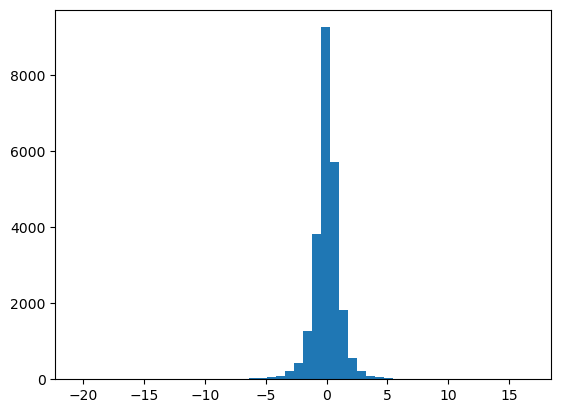

In [26]:
plt.hist(SP_all['return(%)'], bins = 50)
plt.show()

##### For classification I will split return into 3 classes, 'class -1' for the return less than - 0.5%, 'class 0' for the return in between -0.5% to 0.5%, and class '+1' for the return more than 0.5%. 

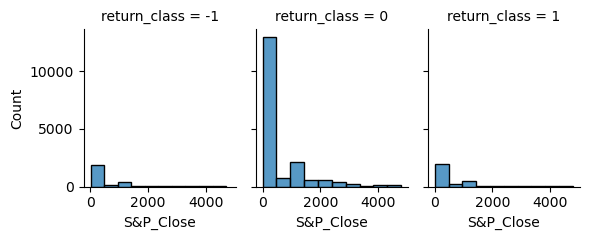

In [18]:
rating_SP = sns.FacetGrid(SP_all, col="return_class", height=2.5, aspect=.80)
rating_SP.map(sns.histplot, "S&P_Close", bins=1)

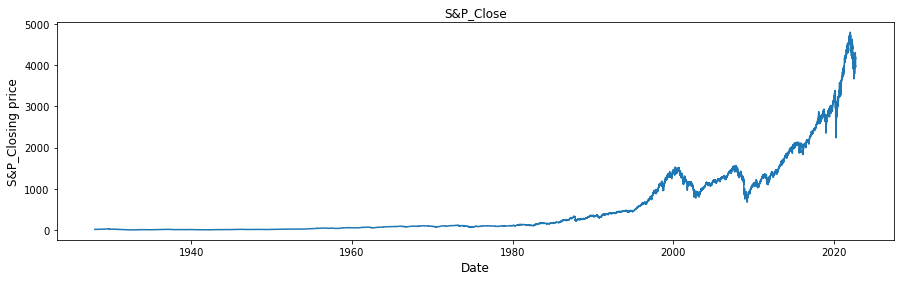

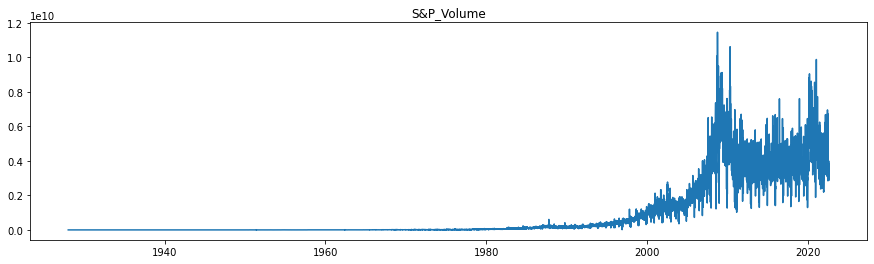

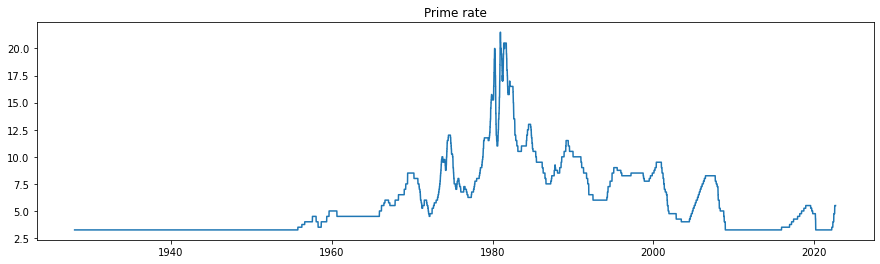

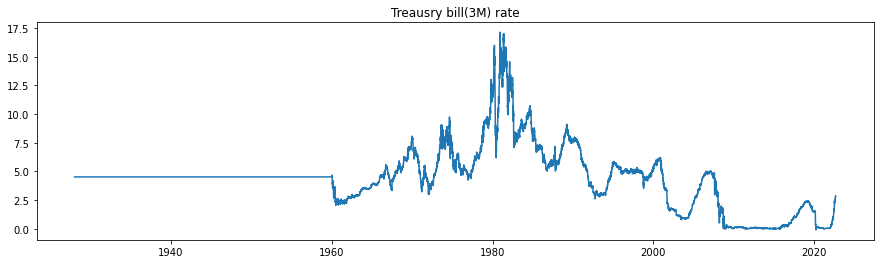

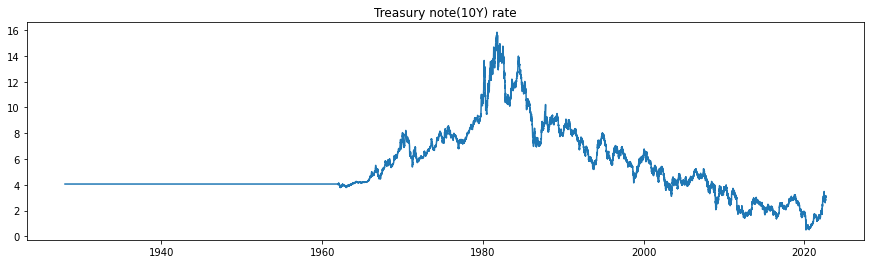

In [33]:
#visualize the data
plt.figure(figsize=(15,4))
plt.title('S&P_Close')
plt.xlabel('Date',fontsize=12)
plt.ylabel('S&P_Closing price',fontsize=12)
plt.plot(SP_all['S&P_Close'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('S&P_Volume')
plt.plot(SP_all['S&P_Volume'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Prime rate')
plt.plot(SP_all['PRIME'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Treausry bill(3M) rate')
plt.plot(SP_all['t_3m_Close'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Treasury note(10Y) rate')
plt.plot(SP_all['t_10y_Close'])
plt.show()


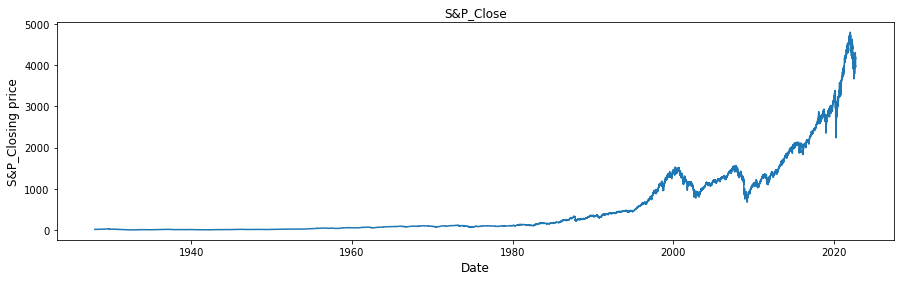

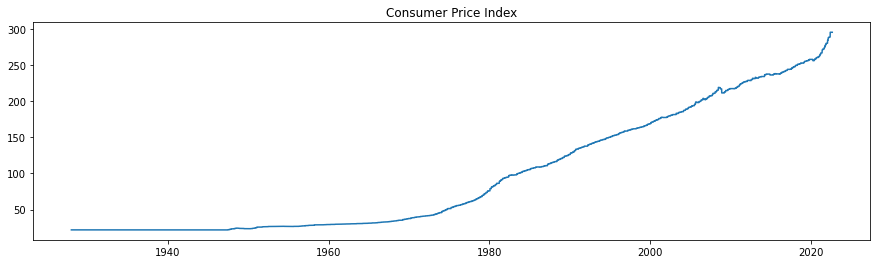

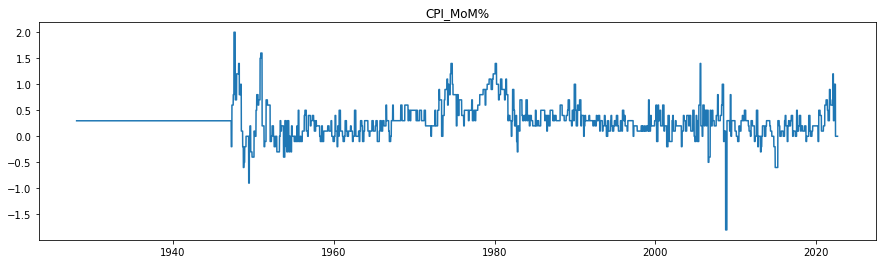

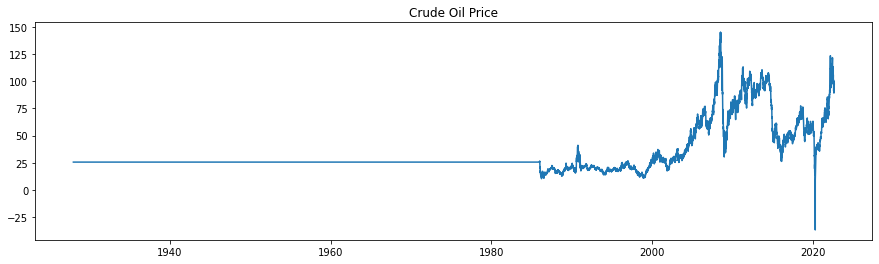

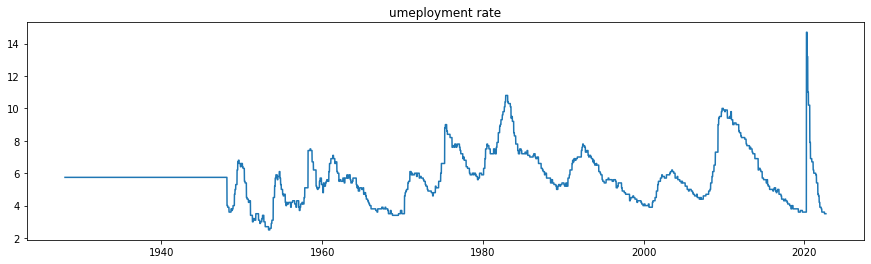

In [34]:
#visualize the data
plt.figure(figsize=(15,4))
plt.title('S&P_Close')
plt.xlabel('Date',fontsize=12)
plt.ylabel('S&P_Closing price',fontsize=12)
plt.plot(SP_all['S&P_Close'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Consumer Price Index')
plt.plot(SP_all['cpi_Value'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('CPI_MoM%')
plt.plot(SP_all['cpi_MoM%'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Crude Oil Price')
plt.plot(SP_all['oil_Price'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('umeployment rate')
plt.plot(SP_all['unemp_rate'])
plt.show()


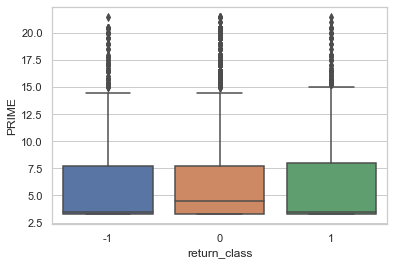

In [35]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='return_class', y='PRIME', data=SP_all)

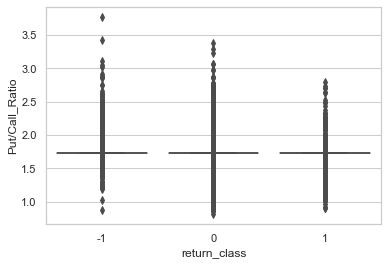

In [36]:
ax = sns.boxplot(x='return_class', y='Put/Call_Ratio', data=SP_all)

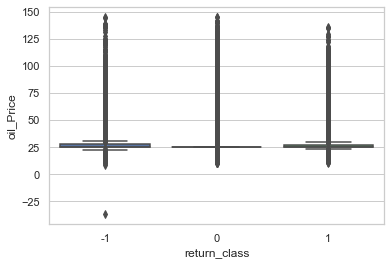

In [37]:
ax = sns.boxplot(x='return_class', y='oil_Price', data=SP_all)

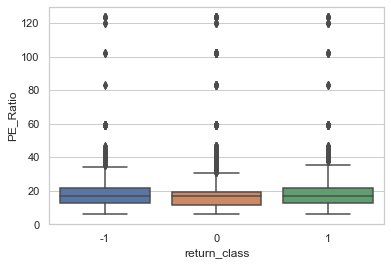

In [38]:
ax = sns.boxplot(x='return_class', y='PE_Ratio', data=SP_all)

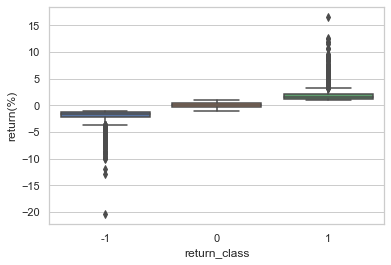

In [39]:
ax = sns.boxplot(x='return_class', y='return(%)', data=SP_all)

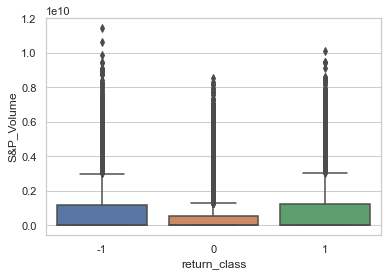

In [40]:
ax = sns.boxplot(x='return_class', y='S&P_Volume', data=SP_all)

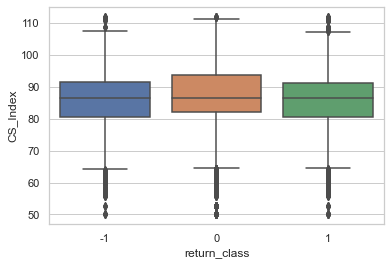

In [41]:
ax = sns.boxplot(x='return_class', y='CS_Index', data=SP_all)

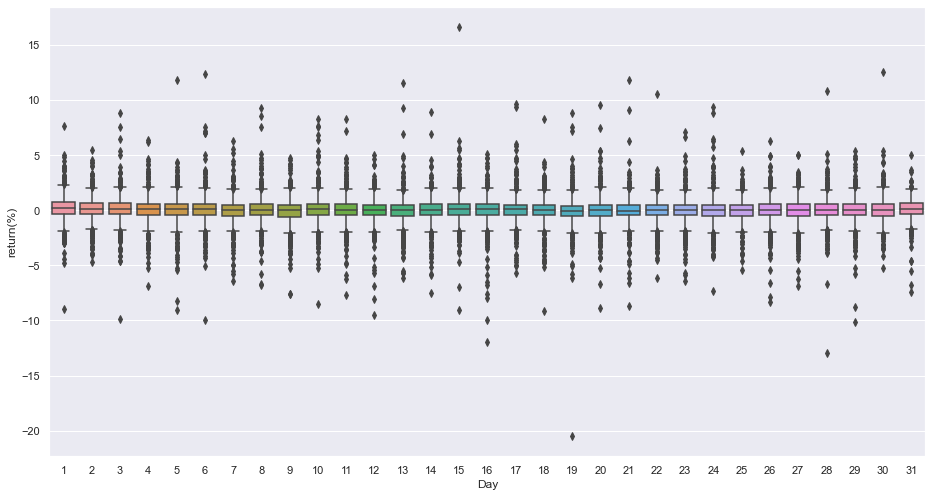

In [42]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Day', y='return(%)', data=SP_all)

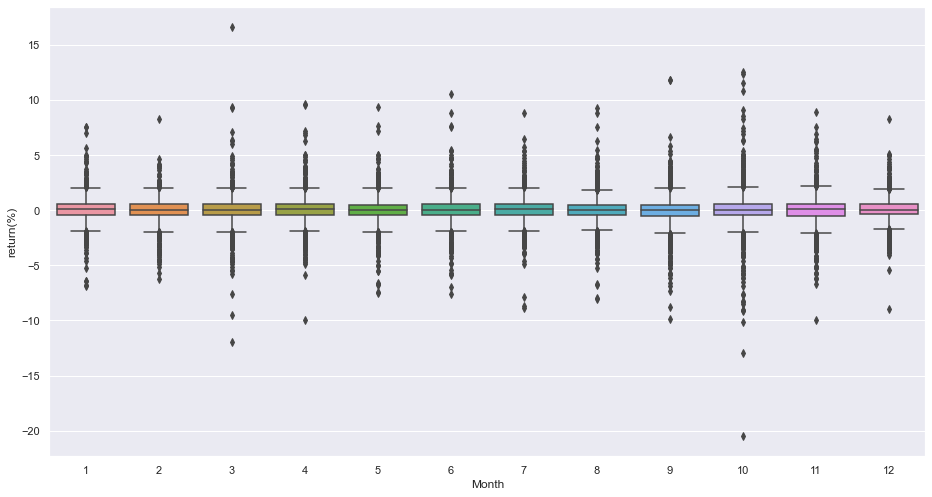

In [43]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Month', y='return(%)', data=SP_all)

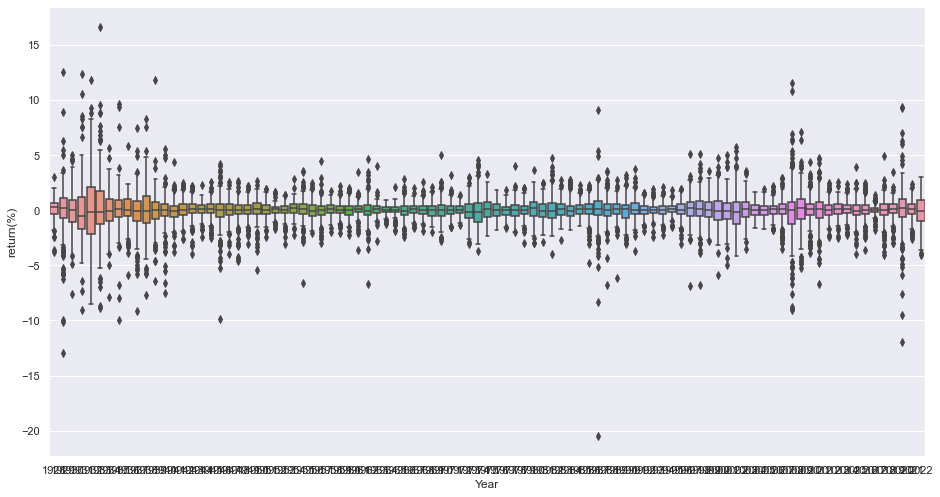

In [44]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Year', y='return(%)', data=SP_all)

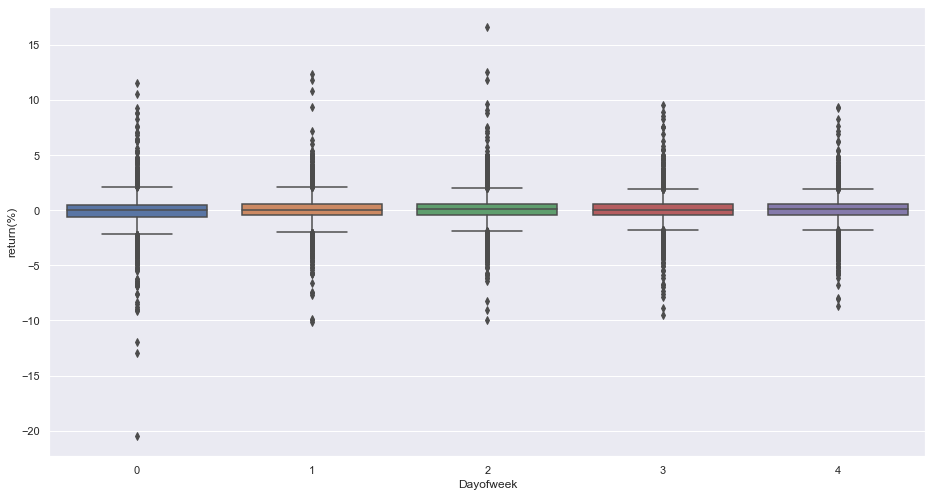

In [45]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Dayofweek', y='return(%)', data=SP_all)

### Monthly data

In [46]:
# Oldest date is 1928-01-06 (Volume records since 1951-Dec-24)
SP = pd.read_csv('data/S&P500.csv')
SP['Date']= pd.to_datetime(SP['Date'])
SP['Year'] = SP['Date'].dt.year
SP['Month'] = SP['Date'].dt.month
SP['Day'] = SP['Date'].dt.day
SP['Dayofweek'] = SP['Date'].dt.dayofweek
# Manually converting 2027 ~ 2072 to Year 1927 ~ 1972 and combine 'Date' again
SP['Year'] = np.where((SP['Year'] >= 2027), SP['Year'] - 100, SP.Year)
SP['Date_adj'] = pd.to_datetime(SP[['Year','Month','Day']])
SP = SP.drop(['Date','Adj Close**'], axis=1)
SP = SP.rename(columns = {'Open':'S&P_Open','Close*':'S&P_Close','Volume':'S&P_Volume','Date_adj':'Date'})
SP = SP.set_index('Date')
SP.replace(to_replace=',', value='', inplace=True, regex = True)
SP.replace(to_replace='-', value=np.nan, inplace=True)


In [47]:
SP.head()

,S&P_Open,High,Low,S&P_Close,S&P_Volume,Year,Month,Day,Dayofweek
Date,,,,,,,,,
2022-09-02,3994.66,4018.43,3906.21,3924.26,4134920000,2022,9,2,4
2022-09-01,3936.73,3970.23,3903.65,3966.85,3754570000,2022,9,1,3
2022-08-31,4000.67,4015.37,3954.53,3955.00,3797860000,2022,8,31,2
2022-08-30,4041.25,4044.98,3965.21,3986.16,3190580000,2022,8,30,1
2022-08-29,4034.58,4062.99,4017.42,4030.61,2963020000,2022,8,29,0


In [48]:
# year list = 1928 - 2021 (which has all month info)
years = SP.index.year.unique()
years = years[1:-1]

months = [12,11,10,9,8,7,6,5,4,3,2,1]
SP_month_open = []
SP_month_close = []
SP_month = []

for year in years:
    for month in months:
        sp_open = SP.loc[(SP.index.year == year) & (SP.index.month == month), 'S&P_Open'][-1]
        sp_close = SP.loc[(SP.index.year == year) & (SP.index.month == month), 'S&P_Close'][0]
        sp_month = str(year)+'-'+str(month)
        SP_month_open.append(sp_open)
        SP_month_close.append(sp_close)
        SP_month.append(sp_month)

In [49]:
SP_monthly = pd.DataFrame(list(zip(SP_month,SP_month_open,SP_month_close)))
SP_monthly.columns = ['Date','S&P_Open','S&P_Close']

In [50]:
year = 2022
months = [8,7,6,5,4,3,2,1]
SP_2022_open = []
SP_2022_close = []
SP_2022month = []

for month in months:
    sp_open = SP.loc[(SP.index.year == year) & (SP.index.month == month), 'S&P_Open'][-1]
    sp_close = SP.loc[(SP.index.year == year) & (SP.index.month == month), 'S&P_Close'][0]
    sp_month = str(year)+'-'+str(month)
    SP_2022_open.append(sp_open)
    SP_2022_close.append(sp_close)
    SP_2022month.append(sp_month)

In [51]:
SP_2022 = pd.DataFrame(list(zip(SP_2022month,SP_2022_open,SP_2022_close)))
SP_2022.columns = ['Date','S&P_Open','S&P_Close']

In [52]:
SP_monthly = pd.concat([SP_2022, SP_monthly])
SP_monthly.head()

,Date,S&P_Open,S&P_Close
0,2022-8,4112.38,3955.00
1,2022-7,3781.00,4130.29
2,2022-6,4149.78,3785.38
3,2022-5,4130.61,4132.15
4,2022-4,4540.32,4131.93


SP_vol = SP.groupby(['Year','Month'])['S&P_Volume'].mean()
SP_vol= SP_vol.reset_index(level=['Year','Month'])
SP_vol = SP_vol.sort_values(['Year','Month'], ascending=False, ignore_index=True)

SP_vol.head(2)

In [53]:
SP_volume = SP['S&P_Volume']
#SP_volume = SP_volume.set_index('Date')
SP_vol_month = SP_volume.resample('MS').mean()

In [54]:
SP_vol_month

Date
1927-12-01              NaN
1928-01-01              NaN
1928-02-01              NaN
1928-03-01              NaN
1928-04-01              NaN
                  ...      
2022-05-01    2.130505e+208
2022-06-01    1.974148e+208
2022-07-01    1.634120e+198
2022-08-01    1.539548e+228
2022-09-01     1.877285e+19
Freq: MS, Name: S&P_Volume, Length: 1138, dtype: float64

In [55]:
SP_monthly['Date'] = pd.to_datetime(SP_monthly['Date'])
SP_monthly[['S&P_Open','S&P_Close']] = SP_monthly[['S&P_Open','S&P_Close']].astype(float)
SP_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 0 to 1127
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1136 non-null   datetime64[ns]
 1   S&P_Open   1136 non-null   float64       
 2   S&P_Close  1136 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 35.5 KB


In [56]:
SP_monthly['Close_t-1'] = SP_monthly['S&P_Close'].shift(-1)
SP_monthly['return(%)'] = (SP_monthly['S&P_Close']-SP_monthly['Close_t-1'])/SP_monthly['Close_t-1'] * 100
# return_class: if daily return is higher than 0.5% -> 1 (positive), if between -0.5 to 0.5% -> 0(neutral)
# if daily return is lower than -0.5% then -1 (negative)
'''SP_monthly['return_class'] = SP_monthly['return(%)'].apply(lambda x: 2 if x >= 3 
                                              else( 1 if x < 3 and x > -3 else 0))
'''
# Binary classification
SP_monthly['return_class'] = SP_monthly['return(%)'].apply(lambda x: 1 if x > 0 else 0)
SP_monthly.head(5)

,Date,S&P_Open,S&P_Close,Close_t-1,return(%),return_class
0,2022-08-01,4112.38,3955.00,4130.29,-4.244012,0
1,2022-07-01,3781.00,4130.29,3785.38,9.111635,1
2,2022-06-01,4149.78,3785.38,4132.15,-8.391999,0
3,2022-05-01,4130.61,4132.15,4131.93,0.005324,1
4,2022-04-01,4540.32,4131.93,4530.41,-8.795672,0


In [57]:
SP_monthly['Close_t+1'] = SP_monthly['S&P_Close'].shift(1)
SP_monthly['t+1_return_class'] = SP_monthly['return_class'].shift(1)

In [58]:
SP_monthly['return_class'].value_counts()

1    675
0    461
Name: return_class, dtype: int64

In [59]:
oil = oil.set_index('Date')
oil_monthly = oil.resample('MS').mean()
oil_monthly.head(2)

,oil_Price
Date,
1986-01-01,22.925455
1986-02-01,15.454737


In [60]:
PutCallRatio = PutCallRatio.set_index('Date')
PCR_monthly = PutCallRatio.resample('MS').mean()
PCR_monthly.head(2)

,Put/Call_Ratio
Date,
2010-07-01,1.504211
2010-08-01,1.936818


In [61]:
treasury_3m = treasury_3m.set_index('Date')
t3m_monthly = treasury_3m.resample('MS').mean()

In [62]:
t3m_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 1960-01-01 to 2022-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   t_3m_Close  752 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [63]:
treasury_10y.replace(to_replace='-', value=np.nan, inplace=True)
treasury_10y_r = treasury_10y.dropna()
treasury_10y_r['year'] = treasury_10y_r['Date'].dt.year
treasury_10y_r['month'] = treasury_10y_r['Date'].dt.month
#treasury_10y_r['year_month']= str(treasury_10y_r['year']) +'-'+ str(treasury_10y_r['month'])
treasury_10y_r.head()

C:\Users\Irene\AppData\Local\Temp\ipykernel_19384\881270581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treasury_10y_r['year'] = treasury_10y_r['Date'].dt.year
C:\Users\Irene\AppData\Local\Temp\ipykernel_19384\881270581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treasury_10y_r['month'] = treasury_10y_r['Date'].dt.month


,Date,t_10y_Close,year,month
0,1962-01-02,4.06,1962,1
1,1962-01-03,4.03,1962,1
2,1962-01-04,3.99,1962,1
3,1962-01-05,4.02,1962,1
5,1962-01-08,4.03,1962,1


In [64]:
treasury_10y_r['t_10y_Close'].unique()

array(['4.06', '4.03', '3.99', ..., '2.989', '3.037', '3.106'],
      dtype=object)

In [65]:
treasury_10y_r.loc[:,('t_10y_Close')] = treasury_10y_r.loc[:,('t_10y_Close')].astype(float)
#treasury_10y_r.groupby(['year','month'])['t_10y_Close'].mean()
t10y_monthly = treasury_10y_r.groupby(['year','month']).mean()
t10y_monthly = t10y_monthly.reset_index(level=['year','month'])
t10y_monthly = t10y_monthly.sort_values(['year','month'], ascending=False, ignore_index=True)

C:\Users\Irene\AppData\Local\Temp\ipykernel_19384\3193855886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treasury_10y_r.loc[:,('t_10y_Close')] = treasury_10y_r.loc[:,('t_10y_Close')].astype(float)


In [66]:
t10y_monthly.tail(2)

,year,month,t_10y_Close
726,1962,2,4.039444
727,1962,1,4.083182


In [67]:
# Merging all data into one file
SP_monthly.set_index('Date')

SP_all_month = SP_monthly.merge(t3m_monthly, on='Date', how='left')
SP_all_month = SP_all_month.join(t10y_monthly)
SP_all_month.drop(['year','month'], axis=1)

,Date,S&P_Open,S&P_Close,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,t_10y_Close
0,2022-08-01,4112.38,3955.00,4130.29,-4.244012,0,NaN,NaN,2.582739,2.899304
1,2022-07-01,3781.00,4130.29,3785.38,9.111635,1,3955.00,0.0,2.166550,2.891750
2,2022-06-01,4149.78,3785.38,4132.15,-8.391999,0,4130.29,1.0,1.442429,3.140524
3,2022-05-01,4130.61,4132.15,4131.93,0.005324,1,3785.38,0.0,0.937286,2.899571
4,2022-04-01,4540.32,4131.93,4530.41,-8.795672,0,4132.15,1.0,0.729900,2.747150
...,...,...,...,...,...,...,...,...,...,...
1131,1928-05-01,19.78,20.00,19.75,1.265823,1,19.14,0.0,NaN,NaN
1132,1928-04-01,18.91,19.75,19.28,2.437759,1,20.00,1.0,NaN,NaN
1133,1928-03-01,17.30,19.28,17.26,11.703360,1,19.75,1.0,NaN,NaN
1134,1928-02-01,17.53,17.26,17.57,-1.764371,0,19.28,1.0,NaN,NaN


In [68]:
SP_all_month.head()

,Date,S&P_Open,S&P_Close,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,year,month,t_10y_Close
0,2022-08-01,4112.38,3955.00,4130.29,-4.244012,0,NaN,NaN,2.582739,2022.0,8.0,2.899304
1,2022-07-01,3781.00,4130.29,3785.38,9.111635,1,3955.00,0.0,2.166550,2022.0,7.0,2.891750
2,2022-06-01,4149.78,3785.38,4132.15,-8.391999,0,4130.29,1.0,1.442429,2022.0,6.0,3.140524
3,2022-05-01,4130.61,4132.15,4131.93,0.005324,1,3785.38,0.0,0.937286,2022.0,5.0,2.899571
4,2022-04-01,4540.32,4131.93,4530.41,-8.795672,0,4132.15,1.0,0.729900,2022.0,4.0,2.747150


In [69]:
Filename = [cpi, oil_monthly, unemployment, SP_PER, SP_EYR, PCR_monthly]
for file in Filename:
    SP_all_month = SP_all_month.merge(file, on='Date', how='left')

In [70]:
SP_all_month.head()

,Date,S&P_Open,S&P_Close,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,year,month,t_10y_Close,cpi_Value,cpi_MoM%,oil_Price,unemp_rate,PE_Ratio,EY_Ratio,Put/Call_Ratio
0,2022-08-01,4112.38,3955.00,4130.29,-4.244012,0,NaN,NaN,2.582739,2022.0,8.0,2.899304,NaN,NaN,93.910952,NaN,20.93,4.78,1.395217
1,2022-07-01,3781.00,4130.29,3785.38,9.111635,1,3955.00,0.0,2.166550,2022.0,7.0,2.891750,295.271,NaN,101.619000,3.5,19.77,5.06,1.386000
2,2022-06-01,4149.78,3785.38,4132.15,-8.391999,0,4130.29,1.0,1.442429,2022.0,6.0,3.140524,295.328,0.0,114.837143,3.6,19.70,5.08,1.469048
3,2022-05-01,4130.61,4132.15,4131.93,0.005324,1,3785.38,0.0,0.937286,2022.0,5.0,2.899571,291.474,1.3,109.552381,3.6,20.42,4.90,1.560476
4,2022-04-01,4540.32,4131.93,4530.41,-8.795672,0,4132.15,1.0,0.729900,2022.0,4.0,2.747150,288.663,1.0,101.777500,3.6,22.19,4.51,1.787500


In [71]:
def year_month(date_data):
    year_month = []
    for date in date_data:
        date_year = date.year
        date_month = date.month
        year_month.append(str(date_year)+'-'+str(date_month))
    return year_month

In [72]:
SP_all_month['year_month'] = year_month(SP_all_month['Date'])

In [73]:
SP_all_month.head()

,Date,S&P_Open,S&P_Close,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,year,month,t_10y_Close,cpi_Value,cpi_MoM%,oil_Price,unemp_rate,PE_Ratio,EY_Ratio,Put/Call_Ratio,year_month
0,2022-08-01,4112.38,3955.00,4130.29,-4.244012,0,NaN,NaN,2.582739,2022.0,8.0,2.899304,NaN,NaN,93.910952,NaN,20.93,4.78,1.395217,2022-8
1,2022-07-01,3781.00,4130.29,3785.38,9.111635,1,3955.00,0.0,2.166550,2022.0,7.0,2.891750,295.271,NaN,101.619000,3.5,19.77,5.06,1.386000,2022-7
2,2022-06-01,4149.78,3785.38,4132.15,-8.391999,0,4130.29,1.0,1.442429,2022.0,6.0,3.140524,295.328,0.0,114.837143,3.6,19.70,5.08,1.469048,2022-6
3,2022-05-01,4130.61,4132.15,4131.93,0.005324,1,3785.38,0.0,0.937286,2022.0,5.0,2.899571,291.474,1.3,109.552381,3.6,20.42,4.90,1.560476,2022-5
4,2022-04-01,4540.32,4131.93,4530.41,-8.795672,0,4132.15,1.0,0.729900,2022.0,4.0,2.747150,288.663,1.0,101.777500,3.6,22.19,4.51,1.787500,2022-4


In [74]:
CSI['year_month'] = year_month(CSI['Date'])
SP_DIV['year_month'] = year_month(SP_DIV['Date'])

Filename = [SP_DIV, CSI]
for file in Filename:
    SP_all_month = SP_all_month.merge(file, on='year_month', how='left')

In [75]:
SP_all_monthly = SP_all_month.drop(['Date_x','Date_y','Date'], axis=1)
SP_all_monthly = SP_all_monthly.set_index('year_month')
SP_all_monthly.head(2)

,S&P_Open,S&P_Close,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,year,month,t_10y_Close,cpi_Value,cpi_MoM%,oil_Price,unemp_rate,PE_Ratio,EY_Ratio,Put/Call_Ratio,Div_Ratio,CS_Index
year_month,,,,,,,,,,,,,,,,,,,,
2022-8,4112.38,3955.00,4130.29,-4.244012,0,NaN,NaN,2.582739,2022.0,8.0,2.899304,NaN,NaN,93.910952,NaN,20.93,4.78,1.395217,NaN,NaN
2022-7,3781.00,4130.29,3785.38,9.111635,1,3955.0,0.0,2.166550,2022.0,7.0,2.891750,295.271,NaN,101.619000,3.5,19.77,5.06,1.386000,NaN,51.5


In [76]:
cols_tobfill = ['t_3m_Close','t_10y_Close','unemp_rate','cpi_Value',
               'cpi_MoM%','oil_Price','PE_Ratio','Div_Ratio','EY_Ratio','CS_Index','Put/Call_Ratio']

for col in cols_tobfill:
    SP_all_monthly[col].fillna(method='bfill', inplace=True)         

In [77]:
# S&P_Volume data to add later?
cols_toffill = ['t_3m_Close','t_10y_Close','cpi_Value','oil_Price','PE_Ratio',
                'Div_Ratio','EY_Ratio']

for col in cols_toffill:
    SP_all_monthly[col].fillna(method='ffill', inplace=True)         

In [78]:
cols_tofill_mean = ['cpi_MoM%','unemp_rate','CS_Index','Put/Call_Ratio']
for col in cols_tofill_mean:
    SP_all_monthly[col].fillna(SP_all[col].mean(), inplace=True)

In [79]:
SP_all_monthly = SP_all_monthly.drop(['year','month'], axis=1)
SP_all_monthly

,S&P_Open,S&P_Close,Close_t-1,return(%),return_class,Close_t+1,t+1_return_class,t_3m_Close,t_10y_Close,cpi_Value,cpi_MoM%,oil_Price,unemp_rate,PE_Ratio,EY_Ratio,Put/Call_Ratio,Div_Ratio,CS_Index
year_month,,,,,,,,,,,,,,,,,,
2022-8,4112.38,3955.00,4130.29,-4.244012,0,NaN,NaN,2.582739,2.899304,295.271,0.000000,93.910952,3.500000,20.93,4.78,1.395217,64.01,51.500000
2022-7,3781.00,4130.29,3785.38,9.111635,1,3955.00,0.0,2.166550,2.891750,295.271,0.000000,101.619000,3.500000,19.77,5.06,1.386000,64.01,51.500000
2022-6,4149.78,3785.38,4132.15,-8.391999,0,4130.29,1.0,1.442429,3.140524,295.328,0.000000,114.837143,3.600000,19.70,5.08,1.469048,64.01,50.000000
2022-5,4130.61,4132.15,4131.93,0.005324,1,3785.38,0.0,0.937286,2.899571,291.474,1.300000,109.552381,3.600000,20.42,4.90,1.560476,64.20,58.400000
2022-4,4540.32,4131.93,4530.41,-8.795672,0,4132.15,1.0,0.729900,2.747150,288.663,1.000000,101.777500,3.600000,22.19,4.51,1.787500,64.21,65.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928-5,19.78,20.00,19.75,1.265823,1,19.14,0.0,4.352000,4.083182,21.480,0.297936,22.925455,5.743915,16.37,6.11,1.734395,13.84,86.365694
1928-4,18.91,19.75,19.28,2.437759,1,20.00,1.0,4.352000,4.083182,21.480,0.297936,22.925455,5.743915,16.17,6.19,1.734395,13.80,86.365694
1928-3,17.30,19.28,17.26,11.703360,1,19.75,1.0,4.352000,4.083182,21.480,0.297936,22.925455,5.743915,15.51,6.45,1.734395,13.69,86.365694


In [80]:
SP_all_monthly.to_csv('SP_all_monthly_binary.csv')

Data explanation: 

`filename` 
* SP_all_monthly : same month return prediction
* SP_all_monthly_t+1 : next month return prediction based on current month information (multiclass)
* SP_all_monthly_binary : next month return prediction based on current month information (binary)
* (SP_all_monthly_t+2 : next month return prediction based on 1-month prior information (multiclass))